# José Ligorría
## 20000604
## PAPD - CIENCIA DE DATOS EN PYTHON - U

In [1]:
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data_inicial = np.load('C:/Users/jose-/Documents/Maestria/Python1/proyecto_data/proyecto_training_data.npy')

In [3]:
np.random.seed(2)
sub1 = np.random.choice(range(data_inicial.shape[0]), int(data_inicial.shape[0]*0.8))
sub2 = np.setdiff1d(range(data_inicial.shape[0]),sub1)
data_entrenamiento = data_inicial[sub1]
data_validacion = data_inicial[sub2]

In [4]:
y = data_entrenamiento[:,0]
names = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

In [5]:
for i in range(data_inicial.shape[1]):
    print('Para la columna ',names[i],' tenemos lo siguiente:')
    print('   La media es de:',np.mean(data_inicial[:,i]))
    print('   EL máximo valor es de:',np.max(data_inicial[:,i]))
    print('   El mínimo valor es de:',np.min(data_inicial[:,i]))
    print('   El rango es de:',np.max(data_inicial[:,i])-np.min(data_inicial[:,i]))
    print('   La desviación estándar es de:',np.std(data_inicial[:,i]))


Para la columna  SalePrice  tenemos lo siguiente:
   La media es de: 180921.19589041095
   EL máximo valor es de: 755000.0
   El mínimo valor es de: 34900.0
   El rango es de: 720100.0
   La desviación estándar es de: 79415.29188606751
Para la columna  OverallQual  tenemos lo siguiente:
   La media es de: 6.0993150684931505
   EL máximo valor es de: 10.0
   El mínimo valor es de: 1.0
   El rango es de: 9.0
   La desviación estándar es de: 1.3825228366585953
Para la columna  1stFlrSF  tenemos lo siguiente:
   La media es de: 1162.626712328767
   EL máximo valor es de: 4692.0
   El mínimo valor es de: 334.0
   El rango es de: 4358.0
   La desviación estándar es de: 386.45532230228963
Para la columna  TotRmsAbvGrd  tenemos lo siguiente:
   La media es de: 6.517808219178082
   EL máximo valor es de: 14.0
   El mínimo valor es de: 2.0
   El rango es de: 12.0
   La desviación estándar es de: 1.624836553698191
Para la columna  YearBuilt  tenemos lo siguiente:
   La media es de: 1971.267808219

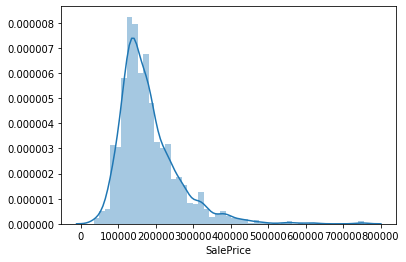

In [6]:
seaborn.distplot(data_inicial[:,0][~np.isnan(data_inicial[:,0])],axlabel=names[0])

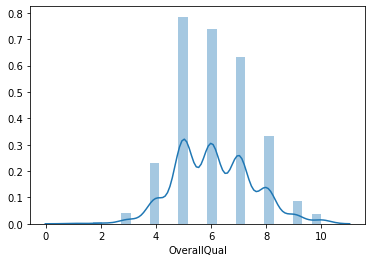

In [7]:
seaborn.distplot(data_inicial[:,1][~np.isnan(data_inicial[:,1])] ,axlabel=names[1])

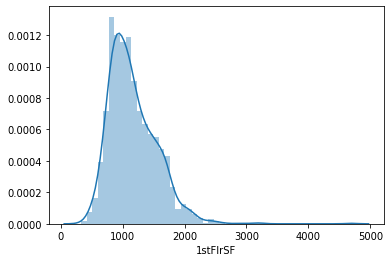

In [8]:
seaborn.distplot(data_inicial[:,2][~np.isnan(data_inicial[:,2])],axlabel=names[2] )

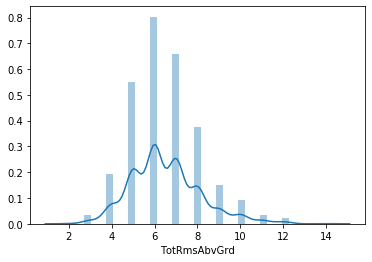

In [9]:
seaborn.distplot(data_inicial[:,3][~np.isnan(data_inicial[:,3])],axlabel=names[3] )

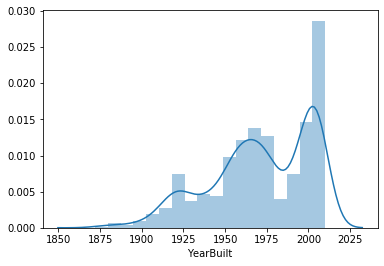

In [10]:
seaborn.distplot(data_inicial[:,4][~np.isnan(data_inicial[:,4])],axlabel=names[4] )

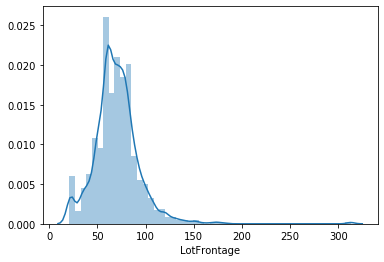

In [11]:
seaborn.distplot(data_inicial[:,5][~np.isnan(data_inicial[:,5])],axlabel=names[5])

In [12]:
las_corr = [[]]
for i in range(1,6):
    las_corr.append(np.corrcoef(data_inicial[:,i][~np.isnan(data_inicial[:,i])],data_inicial[:,0][~np.isnan(data_inicial[:,i])])[0,1])

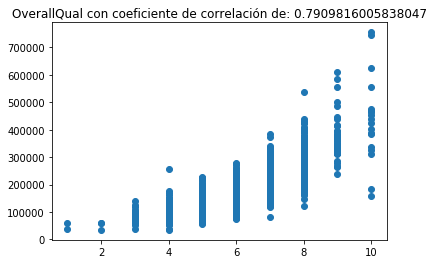

In [13]:
plt.scatter(data_inicial[:,1],data_inicial[:,0])
plt.title(names[1]+' con coeficiente de correlación de: ' + str(las_corr[1]))
plt.show()

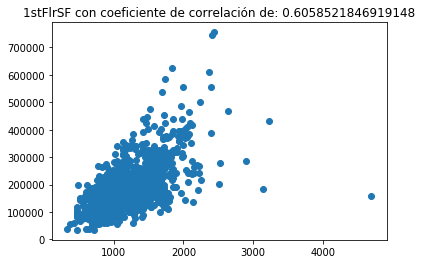

In [14]:
plt.scatter(data_inicial[:,2],data_inicial[:,0])
plt.title(names[2]+' con coeficiente de correlación de: ' + str(las_corr[2]))
plt.show()

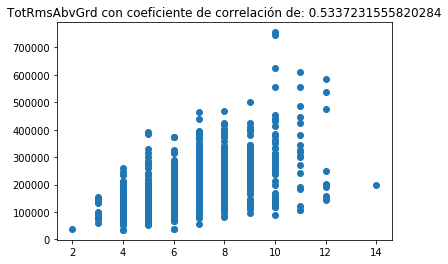

In [15]:
plt.scatter(data_inicial[:,3],data_inicial[:,0])
plt.title(names[3]+' con coeficiente de correlación de: ' + str(las_corr[3]))
plt.show()

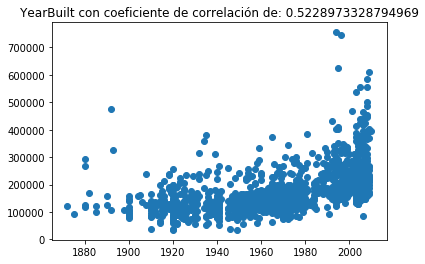

In [16]:
plt.scatter(data_inicial[:,4],data_inicial[:,0])
plt.title(names[4]+' con coeficiente de correlación de: ' + str(las_corr[4]))
plt.show()

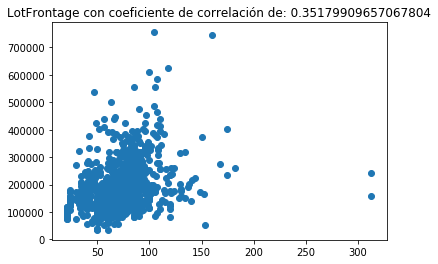

In [17]:
plt.scatter(data_inicial[:,5][~np.isnan(data_inicial[:,5])],data_inicial[:,0][~np.isnan(data_inicial[:,5])])
plt.title(names[5]+' con coeficiente de correlación de: ' + str(las_corr[5]))
plt.show()

De donde vemos que las mejores dos variables son OverallQual y 1stFlrSF que son las dos variables que seguirán en el modelo.

In [18]:
def modelo_regresion1(x,y,epochs,imprimir_error_cada,lr):
    mat_piv = np.transpose(np.array([x,np.ones_like(x)]))
    m,b = np.mean(y)/np.mean(x),1
    vec_piv = [m,b]
    errorres = []
    iteraciones = [vec_piv]
    for i in range(epochs):
        yhat = np.dot(mat_piv , vec_piv)
        #print('yhat: ',yhat,'error: ',0.5 * np.mean((yhat-y)**2))
        errorres.append(0.5 * np.mean((yhat-y)**2))
        diff =  np.array(yhat-y)
        g =  np.matmul(np.array(yhat-y),mat_piv)/len(y)
        #print(g)
        vec_piv -= lr*g
        #print(vec_piv)
        iteraciones.append(vec_piv)
        if (i+1)%imprimir_error_cada == 0:
            #print(vec_piv)
            #print(g)
            print('Epoch ',i+1,' con error de ',0.5* np.mean((yhat-y)**2))
    return  iteraciones,errorres

#iteraciones,errores = modelo_regresion1(np.array([1,2,3,4,5]),np.array([2,2,4,5,6]),5,1,0.001)

In [19]:
def visulizar_errores(vector_errores,nombre):
    plt.plot(vector_errores)
    plt.title('Errores modelo con ' + nombre)
    plt.show()

In [20]:
def visualizar_modelo(x,y,vector_modelos,imprimir_cada,nombre):
    max_x = np.max(x)
    cantidad_x = len(Counter(x))
    mat_piv = np.transpose(np.array([np.linspace(0, max_x,cantidad_x ),np.ones_like(np.linspace(0, max_x, cantidad_x))]))
    for i in range(1,len(vector_modelos)//imprimir_cada+1):
        vec_piv = [vector_modelos[i*imprimir_cada-1][0],vector_modelos[i*imprimir_cada-1][1]]
        yhat = np.dot(mat_piv , vec_piv)
        plt.plot(mat_piv[:,0], yhat)
    plt.scatter(x,y)
    plt.title('scatter: ' + nombre)
    plt.show()
#visualizar_modelo(np.array([1,2,3]),np.array([2,2,4]),iteraciones,1)

In [21]:
iteraciones1,errores1 = modelo_regresion1(data_entrenamiento[:,1],y,10000,1000,0.01)

Epoch  1000  con error de  1032494418.3910186
Epoch  2000  con error de  987572304.1828864
Epoch  3000  con error de  971100346.1967067
Epoch  4000  con error de  965060439.0222273
Epoch  5000  con error de  962845736.9991325
Epoch  6000  con error de  962033654.1459677
Epoch  7000  con error de  961735881.1031264
Epoch  8000  con error de  961626694.232972
Epoch  9000  con error de  961586657.7928014
Epoch  10000  con error de  961571977.3047607


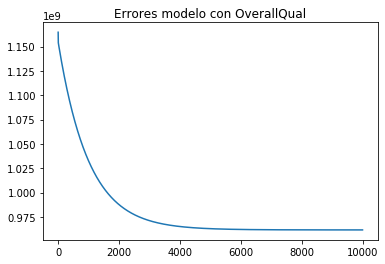

In [22]:
visulizar_errores(errores1,names[1])

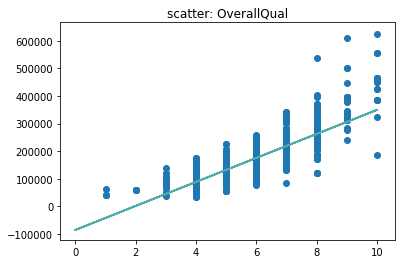

In [23]:
visualizar_modelo(data_entrenamiento[:,1],y,iteraciones1,1000,names[1])

In [24]:
iteraciones2,errores2 = modelo_regresion1(data_entrenamiento[:,2],y,200,20,0.0000011)

Epoch  20  con error de  1702240320.5518188
Epoch  40  con error de  1702240205.3292382
Epoch  60  con error de  1702240090.107919
Epoch  80  con error de  1702239974.887066
Epoch  100  con error de  1702239859.6666782
Epoch  120  con error de  1702239744.4467564
Epoch  140  con error de  1702239629.227301
Epoch  160  con error de  1702239514.0083108
Epoch  180  con error de  1702239398.7897866
Epoch  200  con error de  1702239283.5717278


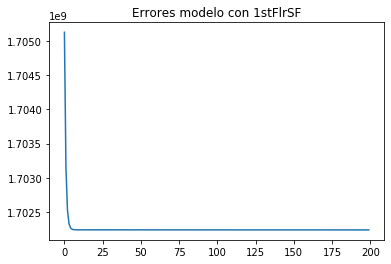

In [25]:
visulizar_errores(errores2,names[2])

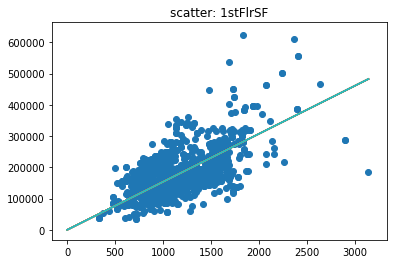

In [26]:
visualizar_modelo(data_entrenamiento[:,2],y,iteraciones2,20,names[2])

In [27]:
X =data_entrenamiento[:,1].copy()
X = X.reshape(-1,1)
Y = y.reshape(-1, 1)
reg1 = LinearRegression().fit(X, Y)
x1=data_validacion[:,1].copy()
x1=x1.reshape(-1,1)

In [28]:
def media_preds(coefs_manual,modelo_learn,arreglo_a_pred):
    mat_piv = np.transpose(np.array([arreglo_a_pred,np.ones_like(arreglo_a_pred)]))
    vec_piv = coefs_manual
    yhat = np.dot(mat_piv , vec_piv)
    ylearn = modelo_learn.predict(arreglo_a_pred)
    ylearn = ylearn.reshape(1,-1)
    y_mean = (yhat+ylearn)*0.5
    #return yhat.shape,ylearn.shape,y_mean.shape
    return yhat,ylearn,y_mean

#media_preds(iteraciones1[len(iteraciones1)-1],reg,x)

In [29]:
def calcula_errores(y_manual,y_modelo,y_mean,y_real,nombre_var):
    error_manual = 0.5 * np.mean((y_manual-y_real)**2)
    error_modelo = 0.5 * np.mean((y_modelo-y_real)**2)
    error_mean = 0.5 * np.mean((y_mean-y_real)**2)
    plt.bar([1],[np.log10(error_manual)],log=True,color = ['blue'],label='iterado')
    plt.bar([2],[np.log10(error_modelo)],log=True,color = ['pink'],label='scikit learn')
    plt.bar([3],[np.log10(error_mean)],log=True,color = ['yellow'],label='media')
    plt.title('Comparativo Errores (aplicando logaritmo) '+nombre_var)
    plt.legend()
    plt.show()
    return np.log10(error_manual),np.log10(error_modelo),np.log10(error_mean)

    

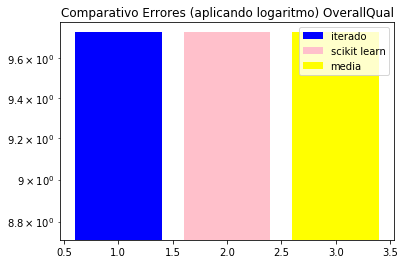

(9.734667713985989, 9.735267450080796, 9.734967529192758)

In [30]:

y_validacion = data_validacion[:,0].reshape(-1, 1)
vects_pred1 = media_preds(iteraciones1[len(iteraciones1)-1],reg1,x1)
calcula_errores(vects_pred1[0],vects_pred1[1],vects_pred1[2],y_validacion,names[1])

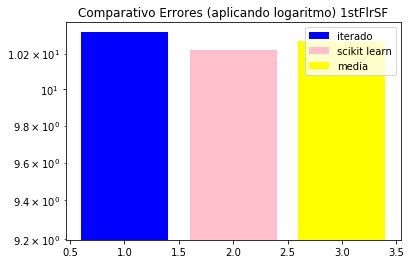

(10.322952863839793, 10.223194038241846, 10.274161539571544)

In [31]:
X =data_entrenamiento[:,2].copy()
X = X.reshape(-1,1)
Y = y.reshape(-1, 1)
reg2 = LinearRegression().fit(X, Y)
x2=data_validacion[:,1].copy()
x2=x2.reshape(-1,1)
vects_pred2 = media_preds(iteraciones2[len(iteraciones2)-1],reg2,x2)
calcula_errores(vects_pred2[0],vects_pred2[1],vects_pred2[2],y_validacion,names[2])


## Conclusiones
Podemos observar que utilizando las mejores dos variables según coeficiente de correlación obtenemos con el método iterado manual un error similar al que obtiene el paquete scikit learn, en particular para la variable 'OverallQal' tenemos un error ligeramente menor, por lo que la aproximación realizada si obtiene resultados significativos.